In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import datetime as dt
import seaborn as sns
from datetime import datetime


# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook') #poster or #talk

In [2]:
df1 = pd.read_excel('Dataset/Part 1.xlsx')
df2 = pd.read_excel('Dataset/Part 2.xlsx')
df3 = pd.read_excel('Dataset/Part 3.xlsx', 'Processed_with_script_80_manual')
df4 = pd.read_excel('Dataset/Part 4.xlsx')
df5 = pd.read_excel('Dataset/Part 5.xlsx')

print(df1.columns)
print(df1.shape)
print(df2.columns)
print(df2.shape)
print(df3.columns)
print(df3.shape)
print(df4.columns)
print(df4.shape)
print(df5.columns)
print(df5.shape)

Index(['Url', 'Owner', 'Repo', 'Number', 'Created_at', 'Updated_at',
       'Handled_at', 'State', 'Title', 'Commits', 'Additions', 'Deletions',
       'Changed_files', 'Language', 'Old package (vulnerable)', 'Old version',
       'New package (safe)', 'New version',
       'Old package introduced in (Projet)',
       'New package proposed in (Advisory)', 'Patch level', 'Severity',
       'Vulnerability (Weakness)', 'Patch changes', 'Comments'],
      dtype='object')
(6613, 25)
Index(['Url', 'Owner', 'Repo', 'Number', 'Created_at', 'Updated_at',
       'Handled_at', 'State', 'Title', 'Commits', 'Additions', 'Deletions',
       'Changed_files', 'Language', 'Old package (vulnerable)', 'Old version',
       'New package (safe)', 'New version',
       'Old package introduced in (Projet)',
       'New package proposed in (Advisory)', 'Patch level', 'Severity',
       'Vulnerability (Weakness)', 'Patch changes', 'Comments'],
      dtype='object')
(6613, 25)
Index(['Url', 'Owner', 'Repo', 'Nu

In [3]:
df = pd.concat([df1, df2, df3, df4, df5])
print(df.shape)
print(df.dtypes)

df1 = ''
df2 = ''
df3 = ''
df4 = ''
df5 = ''

#change types
df['Language'] = df['Language'].astype('category')
df['Severity'] = df['Severity'].astype('category')
df['Patch level'] = df['Patch level'].astype('category')

#fix mixed strings
df['Severity'] = df['Severity'].str.lower()
df['Severity'] = df['Severity'].str.strip()


#fix mixed strings
df['Patch level'] = df['Patch level'].str.lower()
df['Patch level'] = df['Patch level'].str.strip()

print(df.dtypes)

(33064, 25)
Url                                   object
Owner                                 object
Repo                                  object
Number                                 int64
Created_at                            object
Updated_at                            object
Handled_at                            object
State                                 object
Title                                 object
Commits                                int64
Additions                              int64
Deletions                              int64
Changed_files                          int64
Language                              object
Old package (vulnerable)              object
Old version                           object
New package (safe)                    object
New version                           object
Old package introduced in (Projet)    object
New package proposed in (Advisory)    object
Patch level                           object
Severity                              objec

In [4]:
#dealing with missing values, types of features
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

In [5]:
#removing pull requests not handled

df_ = pd.DataFrame(filter_rows_by_values(df, "Handled_at", ["None"]))

df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23474 entries, 1918 to 6612
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Url                                 23474 non-null  object  
 1   Owner                               23474 non-null  object  
 2   Repo                                23474 non-null  object  
 3   Number                              23474 non-null  int64   
 4   Created_at                          23474 non-null  object  
 5   Updated_at                          23474 non-null  object  
 6   Handled_at                          23474 non-null  object  
 7   State                               23474 non-null  object  
 8   Title                               23474 non-null  object  
 9   Commits                             23474 non-null  int64   
 10  Additions                           23474 non-null  int64   
 11  Deletions                 

In [6]:
# set the column type as a str if it isn't already
fields = ["Created_at", "Handled_at"]

for i in fields:
    df_[i] = df_[i].astype('str')
    date_mask = df_[i].str.contains('-')
    df_excel = df_[~date_mask].copy()
    df_reg = df_[date_mask].copy()
    df_reg[i] = pd.to_datetime(df_reg[i])
    df_excel[i] = pd.TimedeltaIndex(df_excel[i].astype(float), unit='d') + datetime(1900, 1, 1)
    df_ = pd.concat([df_reg, df_excel])
df_

,Url,Owner,Repo,Number,Created_at,Updated_at,Handled_at,State,Title,Commits,...,Old version,New package (safe),New version,Old package introduced in (Projet),New package proposed in (Advisory),Patch level,Severity,Vulnerability (Weakness),Patch changes,Comments
1918,https://github.com/authelia/authelia/pull/1243,authelia,authelia,1243,2020-07-29 21:51:00,2020-07-31 01:49:00,2020-07-31 01:49:00,merged,[MISC] (deps): [Security] Bump elliptic from 6...,1,...,6.5.2,elliptic,6.5.3,Not found,2020-07-29 00:00:00,patch,high,Signature Malleabillity,NaN,NaN
1919,https://github.com/nikolas/react-range-step-in...,nikolas,react-range-step-input,136,2021-02-22 06:34:00,2021-03-02 16:13:00,2021-03-02 16:13:00,merged,[Security] Bump lodash from 4.17.11 to 4.17.21,1,...,4.17.11,lodash,4.17.21,Not found,2019-07-10 00:00:00,patch,critical,Prototype Pollution,NaN,Multiple vulnerabilities listed by Dependabot ...
1920,https://github.com/zooniverse/classroom/pull/160,zooniverse,classroom,160,2019-07-10 23:00:00,2019-07-11 16:47:00,2019-07-11 16:47:00,merged,[Security] Bump lodash.merge from 4.6.0 to 4.6.2,1,...,4.6.0,lodash.merge,4.6.2,Not found,2020-09-03 00:00:00,patch,high,Prototype Pollution,NaN,Manually looked at GitHub Advisory Database;
1921,https://github.com/freesewing/freesewing.org/p...,freesewing,freesewing.org,31,2019-08-15 14:44:00,2019-08-24 21:23:00,2019-08-24 21:13:00,merged,â¬†ï¸ðŸ”’ Bump lodash from 4.17.11 to 4.17.15,1,...,4.17.11,lodash,4.17.15,Not found,NaN,patch,NaN,NaN,NaN,Manually looked at GitHub Advisory Database; A...
1922,https://github.com/GroceriStar/react-shopping-...,GroceriStar,react-shopping-list-template,314,2019-07-11 00:07:00,2019-07-12 02:24:00,2019-07-12 02:24:00,merged,[Security] Bump lodash.template from 4.4.0 to ...,1,...,4.4.0,lodash.template,4.5.0,2018-10-02 00:00:00,NaN,minor,NaN,NaN,NaN,Manually looked at GitHub Advisory Database; A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6607,https://github.com/hiberbee/hiberbee.github.io...,hiberbee,hiberbee.github.io,95,2020-07-31 21:21:36,44230.15,2021-02-05 03:36:00,closed,[Security] Bump elliptic from 6.5.2 to 6.5.3,1,...,6.5.2,elliptic,6.5.3,4/19/2020,7/29/2020,patch,high,Signature Malleabillity,NaN,NaN
6608,https://github.com/Arunkumar-MS/InfiniteScroll...,Arunkumar-MS,InfiniteScroll,75,2021-01-15 22:19:12,44221.93,2021-01-27 22:19:12,closed,[Security] Bump systeminformation from 4.26.9 ...,1,...,4.26.9,systeminformation,4.34.7,12/28/2020,10/27/2020,minor,high,command injection vulnerability,Multiple files changed on commit (2); Multiple...,NaN
6609,https://github.com/balajimanoharan/ember-apexc...,balajimanoharan,ember-apexchartsjs,33,2020-05-01 22:33:36,43962.4,2020-05-13 09:36:00,closed,[Security] Bump jquery from 3.4.1 to 3.5.0,1,...,3.4.1,jquery,3.5.0,Not found,4/29/2020,minor,moderate,Potential XSS vulnerability,Multiple vulnerabilities listed by Dependabot ...,NaN
6610,https://github.com/JoshuaHall/personal-site/pu...,JoshuaHall,personal-site,192,2020-08-09 22:48:00,44113.18,2020-10-11 04:19:12,closed,[Security] Bump prismjs from 1.20.0 to 1.21.0,1,...,1.20.0,prismjs,1.21.0,Not found,2020-07-08 00:00:00,minor,high,Cross-Site Scripting,Multiple files changed on commit (2);,NaN


In [7]:
df_['Handled_at'] = df_['Handled_at'].astype('datetime64[ns]')

df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23474 entries, 1918 to 6611
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Url                                 23474 non-null  object        
 1   Owner                               23474 non-null  object        
 2   Repo                                23474 non-null  object        
 3   Number                              23474 non-null  int64         
 4   Created_at                          23474 non-null  datetime64[ns]
 5   Updated_at                          23474 non-null  object        
 6   Handled_at                          23474 non-null  datetime64[ns]
 7   State                               23474 non-null  object        
 8   Title                               23474 non-null  object        
 9   Commits                             23474 non-null  int64         
 10  Additions           

In [8]:
df_['Cost'] = df_['Handled_at'] - df_['Created_at']

In [9]:
print(df_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23474 entries, 1918 to 6611
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Url                                 23474 non-null  object         
 1   Owner                               23474 non-null  object         
 2   Repo                                23474 non-null  object         
 3   Number                              23474 non-null  int64          
 4   Created_at                          23474 non-null  datetime64[ns] 
 5   Updated_at                          23474 non-null  object         
 6   Handled_at                          23474 non-null  datetime64[ns] 
 7   State                               23474 non-null  object         
 8   Title                               23474 non-null  object         
 9   Commits                             23474 non-null  int64          
 10  Addition

In [10]:
df_['Commits'].describe()

count    23474.000000
mean         1.448113
std         32.234537
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       4569.000000
Name: Commits, dtype: float64

In [11]:
df_['Cost'].describe(datetime_is_numeric=True)

count                         23474
mean     44 days 05:51:10.259350770
std      80 days 03:27:47.409231565
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 9 days 14:48:30
75%                48 days 23:54:09
max               910 days 01:38:00
Name: Cost, dtype: object

In [12]:
#preparing data on severity
#print(df_.)
df_['Severity'] = df_['Severity'].replace({'low':'1-Low', 'medium':'2-Medium', 'moderate':'3-Moderate', 'high':'4-High', 'critical':'5-Critical'})

cat_type = CategoricalDtype(categories=["1-Low", "2-Medium", "3-Moderate", "4-High", "5-Critical"], ordered=True)

df_.loc[:, ['Severity']] = df_[['Severity']].astype(cat_type)
df_.sort_values('Severity', ascending=True)

#print(df_['Severity'].describe())
print(df_['Severity'].value_counts())
print(df_['Severity'].tail())

4-High        6862
3-Moderate    3193
5-Critical    2500
2-Medium      1092
1-Low          911
Name: Severity, dtype: int64
6607        4-High
6608        4-High
6609    3-Moderate
6610        4-High
6611           NaN
Name: Severity, dtype: category
Categories (5, object): ['1-Low' < '2-Medium' < '3-Moderate' < '4-High' < '5-Critical']


In [13]:
#preparing data on Patch level

df_['Patch level'] = df_['Patch level'].replace({'minor':'1-Minor', 'major':'2-Major', 'patch':'0-Patch'})
df_['Patch level'] = df_['Patch level'].astype('category')

df_['Patch level'].value_counts()

0-Patch    10420
1-Minor     6478
2-Major     1573
Name: Patch level, dtype: int64

In [14]:
df_['Language'].value_counts()

JavaScript    10052
TypeScript     4788
Ruby           3632
Python          978
PHP             943
HTML            893
Vue             680
Java            529
CSS             491
Rust            289
Multiple        199
Name: Language, dtype: int64

From all the columns included in the data, we use the Patch level (Patch level), the Severity (Severity), the date the Old package introduced in (Projet) minus the date the New package proposed in (Advisory) (agility), and the number of Changed_files - including Additions and Deletions - for each pull request (Changed_files).

In [15]:
#filter out only relevant features/columns

df_ = df_[['Severity', 'Patch level', 'Cost', 'Additions', 'Deletions', 'Changed_files', 'Language']].copy()
df_.loc[:,'Cost_in_Days'] = df_.loc[:, 'Cost'].dt.days

df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23474 entries, 1918 to 6611
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Severity       14558 non-null  category       
 1   Patch level    18471 non-null  category       
 2   Cost           23474 non-null  timedelta64[ns]
 3   Additions      23474 non-null  int64          
 4   Deletions      23474 non-null  int64          
 5   Changed_files  23474 non-null  int64          
 6   Language       23474 non-null  category       
 7   Cost_in_Days   23474 non-null  int64          
dtypes: category(3), int64(4), timedelta64[ns](1)
memory usage: 1.1 MB


In [16]:
df_['Cost_in_Days'].sum()

1029250

In [17]:
#Preparing the data on Languages

#To rank-order the Languages based on their average cost
x_axis = df_.groupby(['Language']).agg(
    Average_Cost_in_Days=pd.NamedAgg(column='Cost_in_Days', aggfunc=np.mean),
    Sum_Cost_in_Days=pd.NamedAgg(column='Cost_in_Days', aggfunc=np.sum),
).sort_values(by='Average_Cost_in_Days', ascending=False).reset_index()

#x_axis.reset_index()

x_axis['Rank_Average'] = x_axis['Average_Cost_in_Days'].rank().astype(int)
x_axis['Rank_Sum'] = x_axis['Sum_Cost_in_Days'].rank().astype(int)

x_axis['Rank_Average'] = x_axis['Rank_Average'].astype('str')
x_axis['Rank_Average'] = x_axis['Rank_Average'].str.zfill(2)

x_axis['Rank_Sum'] = x_axis['Rank_Sum'].astype('str')
x_axis['Rank_Sum'] = x_axis['Rank_Sum'].str.zfill(2)

x_axis['Language_Cost'] = x_axis['Rank_Average'].astype(str) + ': ' + x_axis['Language'].astype(str)

In [18]:
df_['Language']= df_['Language'].cat.rename_categories({'Python': x_axis[x_axis['Language']=='Python']['Language_Cost'].values[0],
                                                        'PHP': x_axis[x_axis['Language']=='PHP']['Language_Cost'].values[0],
                                                        'Java': x_axis[x_axis['Language']=='Java']['Language_Cost'].values[0],
                                                        'Multiple': x_axis[x_axis['Language']=='Multiple']['Language_Cost'].values[0],
                                                        'HTML': x_axis[x_axis['Language']=='HTML']['Language_Cost'].values[0],
                                                        'Rust': x_axis[x_axis['Language']=='Rust']['Language_Cost'].values[0],
                                                        'CSS': x_axis[x_axis['Language']=='CSS']['Language_Cost'].values[0],
                                                        'Ruby': x_axis[x_axis['Language']=='Ruby']['Language_Cost'].values[0],
                                                        'JavaScript': x_axis[x_axis['Language']=='JavaScript']['Language_Cost'].values[0],
                                                        'Vue': x_axis[x_axis['Language']=='Vue']['Language_Cost'].values[0],
                                                        'TypeScript': x_axis[x_axis['Language']=='TypeScript']['Language_Cost'].values[0],

                                                        
                                                        
                                                       
                                                       });
print(x_axis)

cat_type = CategoricalDtype(categories=x_axis["Language_Cost"], ordered=True)

df_.loc[:, ['Language']] = df_[['Language']].astype(cat_type)

df_["Language"].cat.categories.values

      Language  Average_Cost_in_Days  Sum_Cost_in_Days Rank_Average Rank_Sum  \
0         Rust             53.297578             15403           11       02   
1          CSS             53.063136             26054           10       04   
2       Python             51.513292             50380           09       08   
3         HTML             45.437850             40576           08       07   
4         Ruby             44.569934            161878           07       09   
5   JavaScript             44.265718            444959           06       11   
6          Vue             41.486765             28211           05       05   
7   TypeScript             41.206349            197296           04       10   
8         Java             40.856333             21613           03       03   
9     Multiple             37.693467              7501           02       01   
10         PHP             37.517497             35379           01       06   

     Language_Cost  
0         11: Rust

array(['11: Rust', '10: CSS', '09: Python', '08: HTML', '07: Ruby',
       '06: JavaScript', '05: Vue', '04: TypeScript', '03: Java',
       '02: Multiple', '01: PHP'], dtype=object)

In [19]:
# Second attempt with "month" as the category data type
x_axis = x_axis.sort_values(by=['Language_Cost'])
categories = x_axis["Language_Cost"].sort_values(ascending=False)

df_["Language"] = pd.Categorical(df_["Language"], categories=categories, ordered=True)
print(df_['Language'].value_counts())
print(df_['Language'].tail())
print(categories)

06: JavaScript    10052
04: TypeScript     4788
07: Ruby           3632
09: Python          978
01: PHP             943
08: HTML            893
05: Vue             680
03: Java            529
10: CSS             491
11: Rust            289
02: Multiple        199
Name: Language, dtype: int64
6607        09: Python
6608    06: JavaScript
6609          07: Ruby
6610           05: Vue
6611    04: TypeScript
Name: Language, dtype: category
Categories (11, object): ['11: Rust' < '10: CSS' < '09: Python' < '08: HTML' ... '04: TypeScript' < '03: Java' < '02: Multiple' < '01: PHP']
0           11: Rust
1            10: CSS
2         09: Python
3           08: HTML
4           07: Ruby
5     06: JavaScript
6            05: Vue
7     04: TypeScript
8           03: Java
9       02: Multiple
10           01: PHP
Name: Language_Cost, dtype: object


In [20]:
#Aggregate / Average data on Cost by Language, Severity and Patch level

df_agg = df_.groupby(['Patch level', 'Severity', 'Language']).agg(
    Cost=pd.NamedAgg(column='Cost_in_Days', aggfunc=np.mean),
    Count=pd.NamedAgg(column='Cost_in_Days', aggfunc='count'),
    Files_changed=pd.NamedAgg(column='Changed_files', aggfunc='mean'),
    Adds=pd.NamedAgg(column='Additions', aggfunc='mean'),
    Dels=pd.NamedAgg(column='Deletions', aggfunc='mean'),
)

print(df_agg.dtypes, df_agg.columns, df_agg.keys, df_agg.index)
df_agg.to_clipboard()

Cost             float64
Count              int64
Files_changed    float64
Adds             float64
Dels             float64
dtype: object Index(['Cost', 'Count', 'Files_changed', 'Adds', 'Dels'], dtype='object') <bound method NDFrame.keys of                                             Cost  Count  Files_changed  \
Patch level Severity   Language                                          
0-Patch     1-Low      11: Rust        13.571429      7       1.000000   
                       10: CSS         50.000000     11       1.363636   
                       09: Python      40.800000     20       1.200000   
                       08: HTML        48.800000     10       1.100000   
                       07: Ruby        25.111111     36       1.055556   
...                                          ...    ...            ...   
2-Major     5-Critical 05: Vue         25.500000      2       1.000000   
                       04: TypeScript  34.862069     29       5.068966   
                 

In [21]:
df_agg.reset_index()

,Patch level,Severity,Language,Cost,Count,Files_changed,Adds,Dels
0,0-Patch,1-Low,11: Rust,13.571429,7,1.000000,38.714286,41.857143
1,0-Patch,1-Low,10: CSS,50.000000,11,1.363636,683.818182,1339.272727
2,0-Patch,1-Low,09: Python,40.800000,20,1.200000,120.500000,98.700000
3,0-Patch,1-Low,08: HTML,48.800000,10,1.100000,7.600000,16.300000
4,0-Patch,1-Low,07: Ruby,25.111111,36,1.055556,46.055556,27.861111
...,...,...,...,...,...,...,...,...
160,2-Major,5-Critical,05: Vue,25.500000,2,1.000000,5.500000,2.000000
161,2-Major,5-Critical,04: TypeScript,34.862069,29,5.068966,2930.689655,269.000000
162,2-Major,5-Critical,03: Java,9.500000,4,2.000000,1650.250000,1538.000000
163,2-Major,5-Critical,02: Multiple,45.500000,2,2.000000,5.500000,5.500000


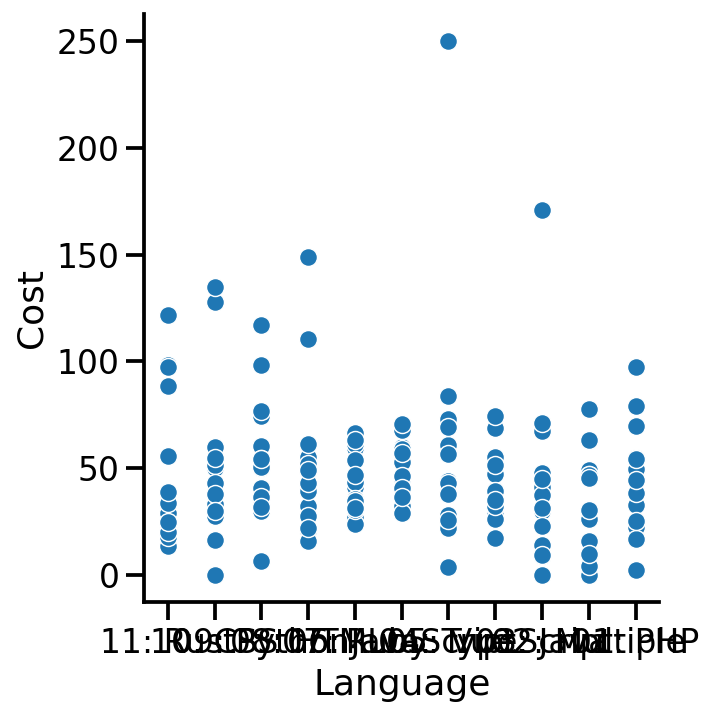

In [22]:
hue_data = df_.groupby(['Language', 'Severity', 'Patch level']).agg(
    Cost=pd.NamedAgg(column='Cost_in_Days', aggfunc=np.mean))
hue_data.reset_index()
sns.set_context("talk") # "poster"

sns.relplot(data=hue_data, y="Cost", x="Language")

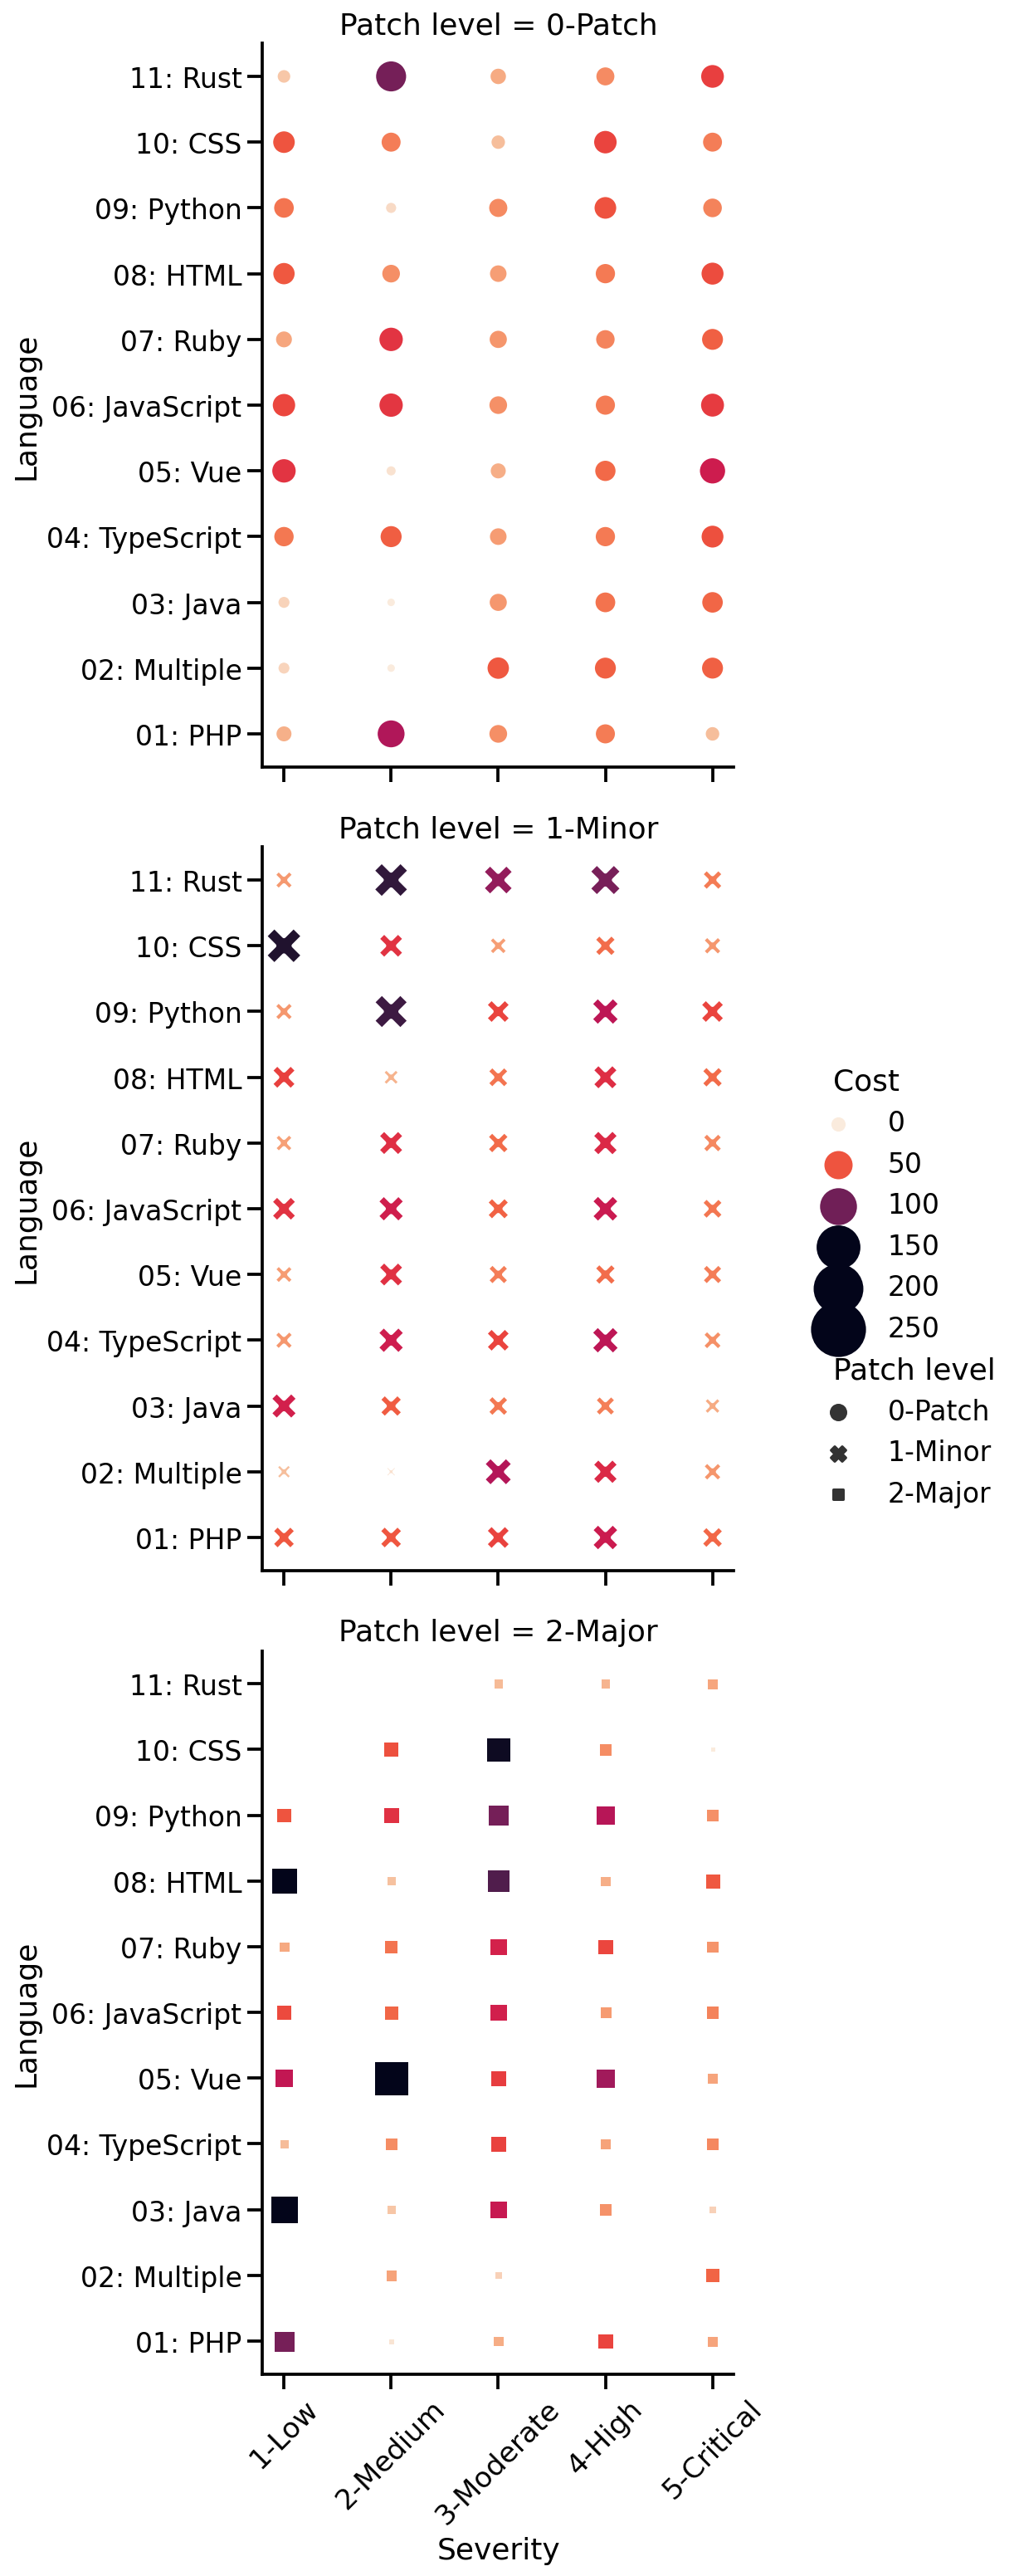

In [23]:
f = sns.relplot(x="Severity", style="Patch level", row="Patch level", y="Language", hue="Cost", size="Cost", height=7, sizes=(50, 1000), data=hue_data, aspect=1, kind="scatter", hue_norm=(0, 140), size_norm=(0, 250), legend="brief", palette="rocket_r", linewidth=3, lw=2.5);

sns.set_context("talk") # "poster"

f.tight_layout()
plt.xticks(rotation="45", label="t")
plt.tick_params(axis='x', labelsize=17)
#plt.tick_params(axis='y', labelsize=24)

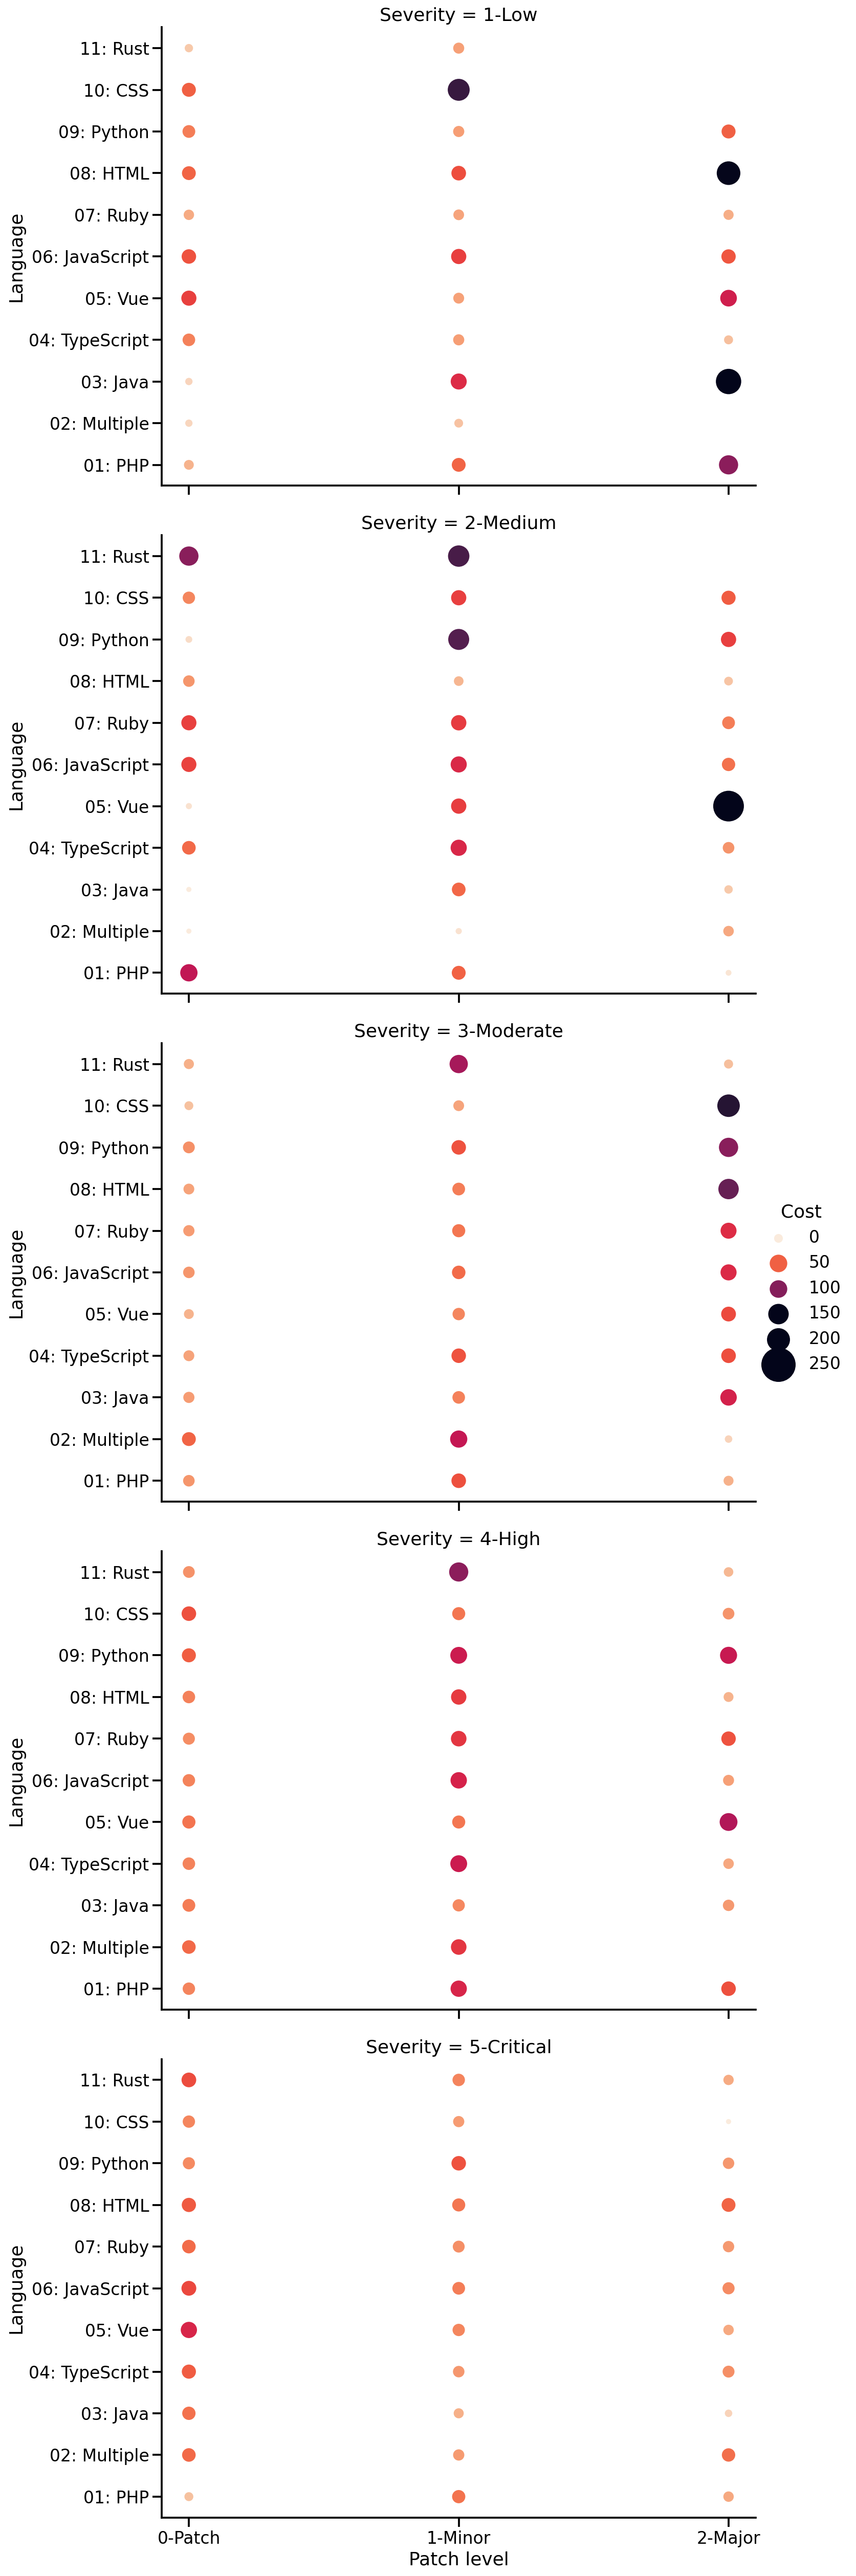

In [24]:
sns.relplot(x="Patch level", row="Severity", y="Language", hue="Cost", size="Cost", height=7, sizes=(50, 2000), data=hue_data, aspect=1.5, kind="scatter", hue_norm=(0, 150), size_norm=(0, 500),
           legend="brief", palette="rocket_r", linewidth=2);

#plt.xticks(df_agg['Patch level'][::5])   

<AxesSubplot:xlabel='Severity', ylabel='Cost'>

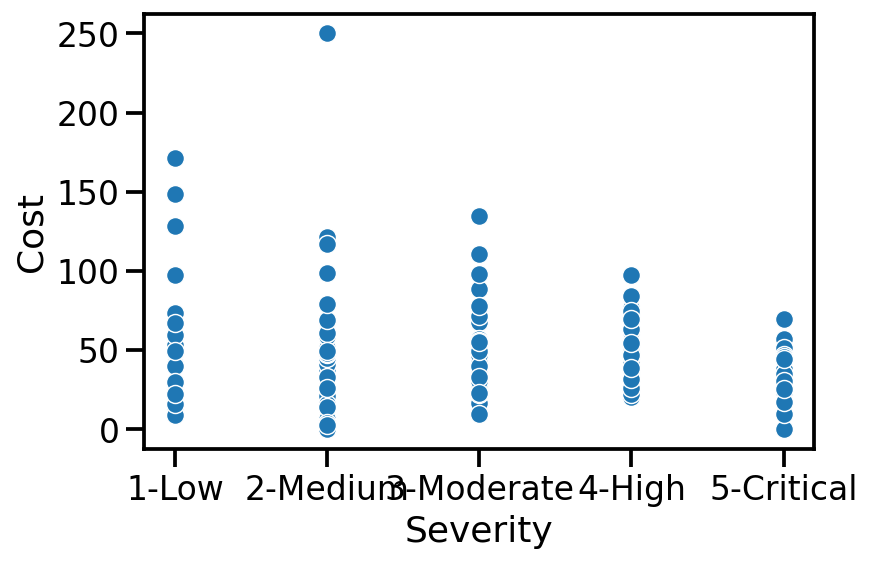

In [25]:
#finally plot the data

sns.scatterplot(data = hue_data, x = "Severity", y = "Cost")

<AxesSubplot:xlabel='Language', ylabel='Cost'>

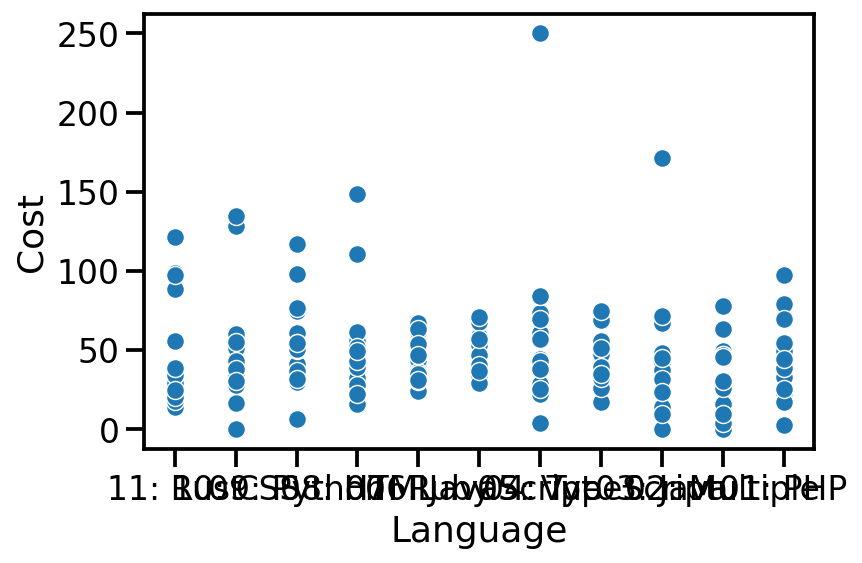

In [26]:
sns.scatterplot(data = hue_data, x = "Language", y = "Cost")

<AxesSubplot:xlabel='Patch level', ylabel='Cost'>

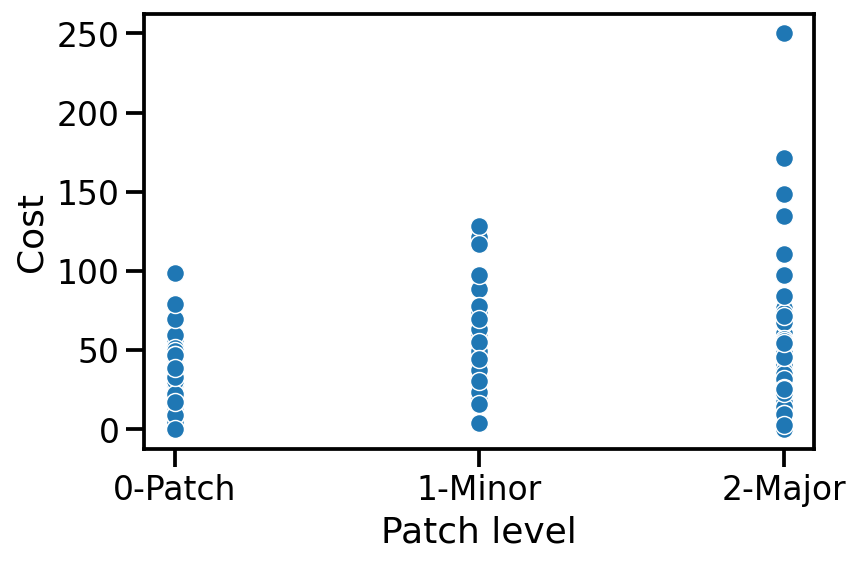

In [27]:
sns.scatterplot(data = hue_data, x = "Patch level", y = "Cost")

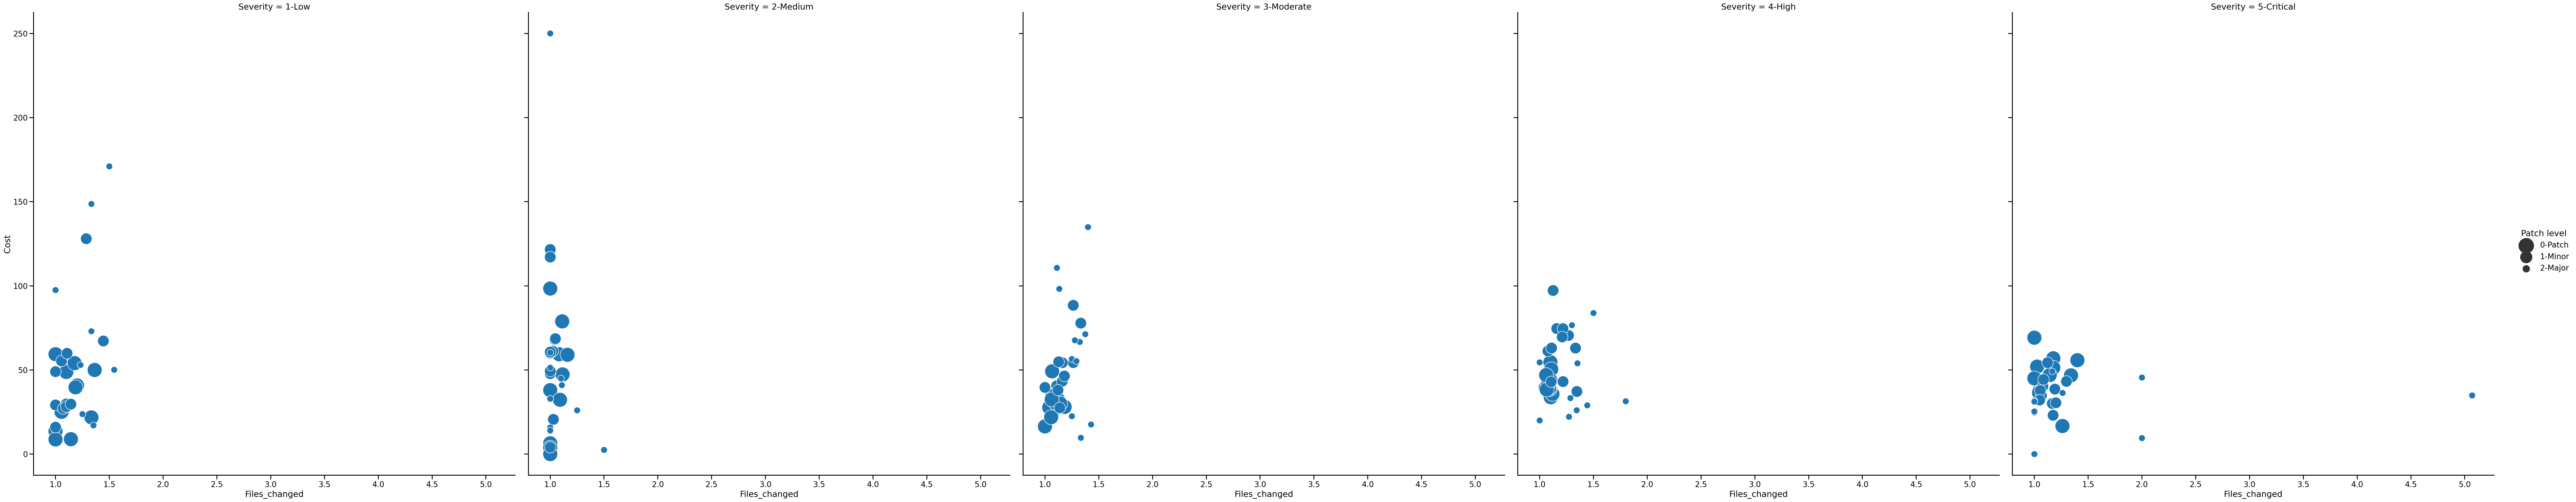

In [28]:
##CHANGE X-AXIS to reduce it

sns.relplot(x="Files_changed", y="Cost", size="Patch level", col="Severity", sizes=(200, 1000), height=15, data=df_agg);

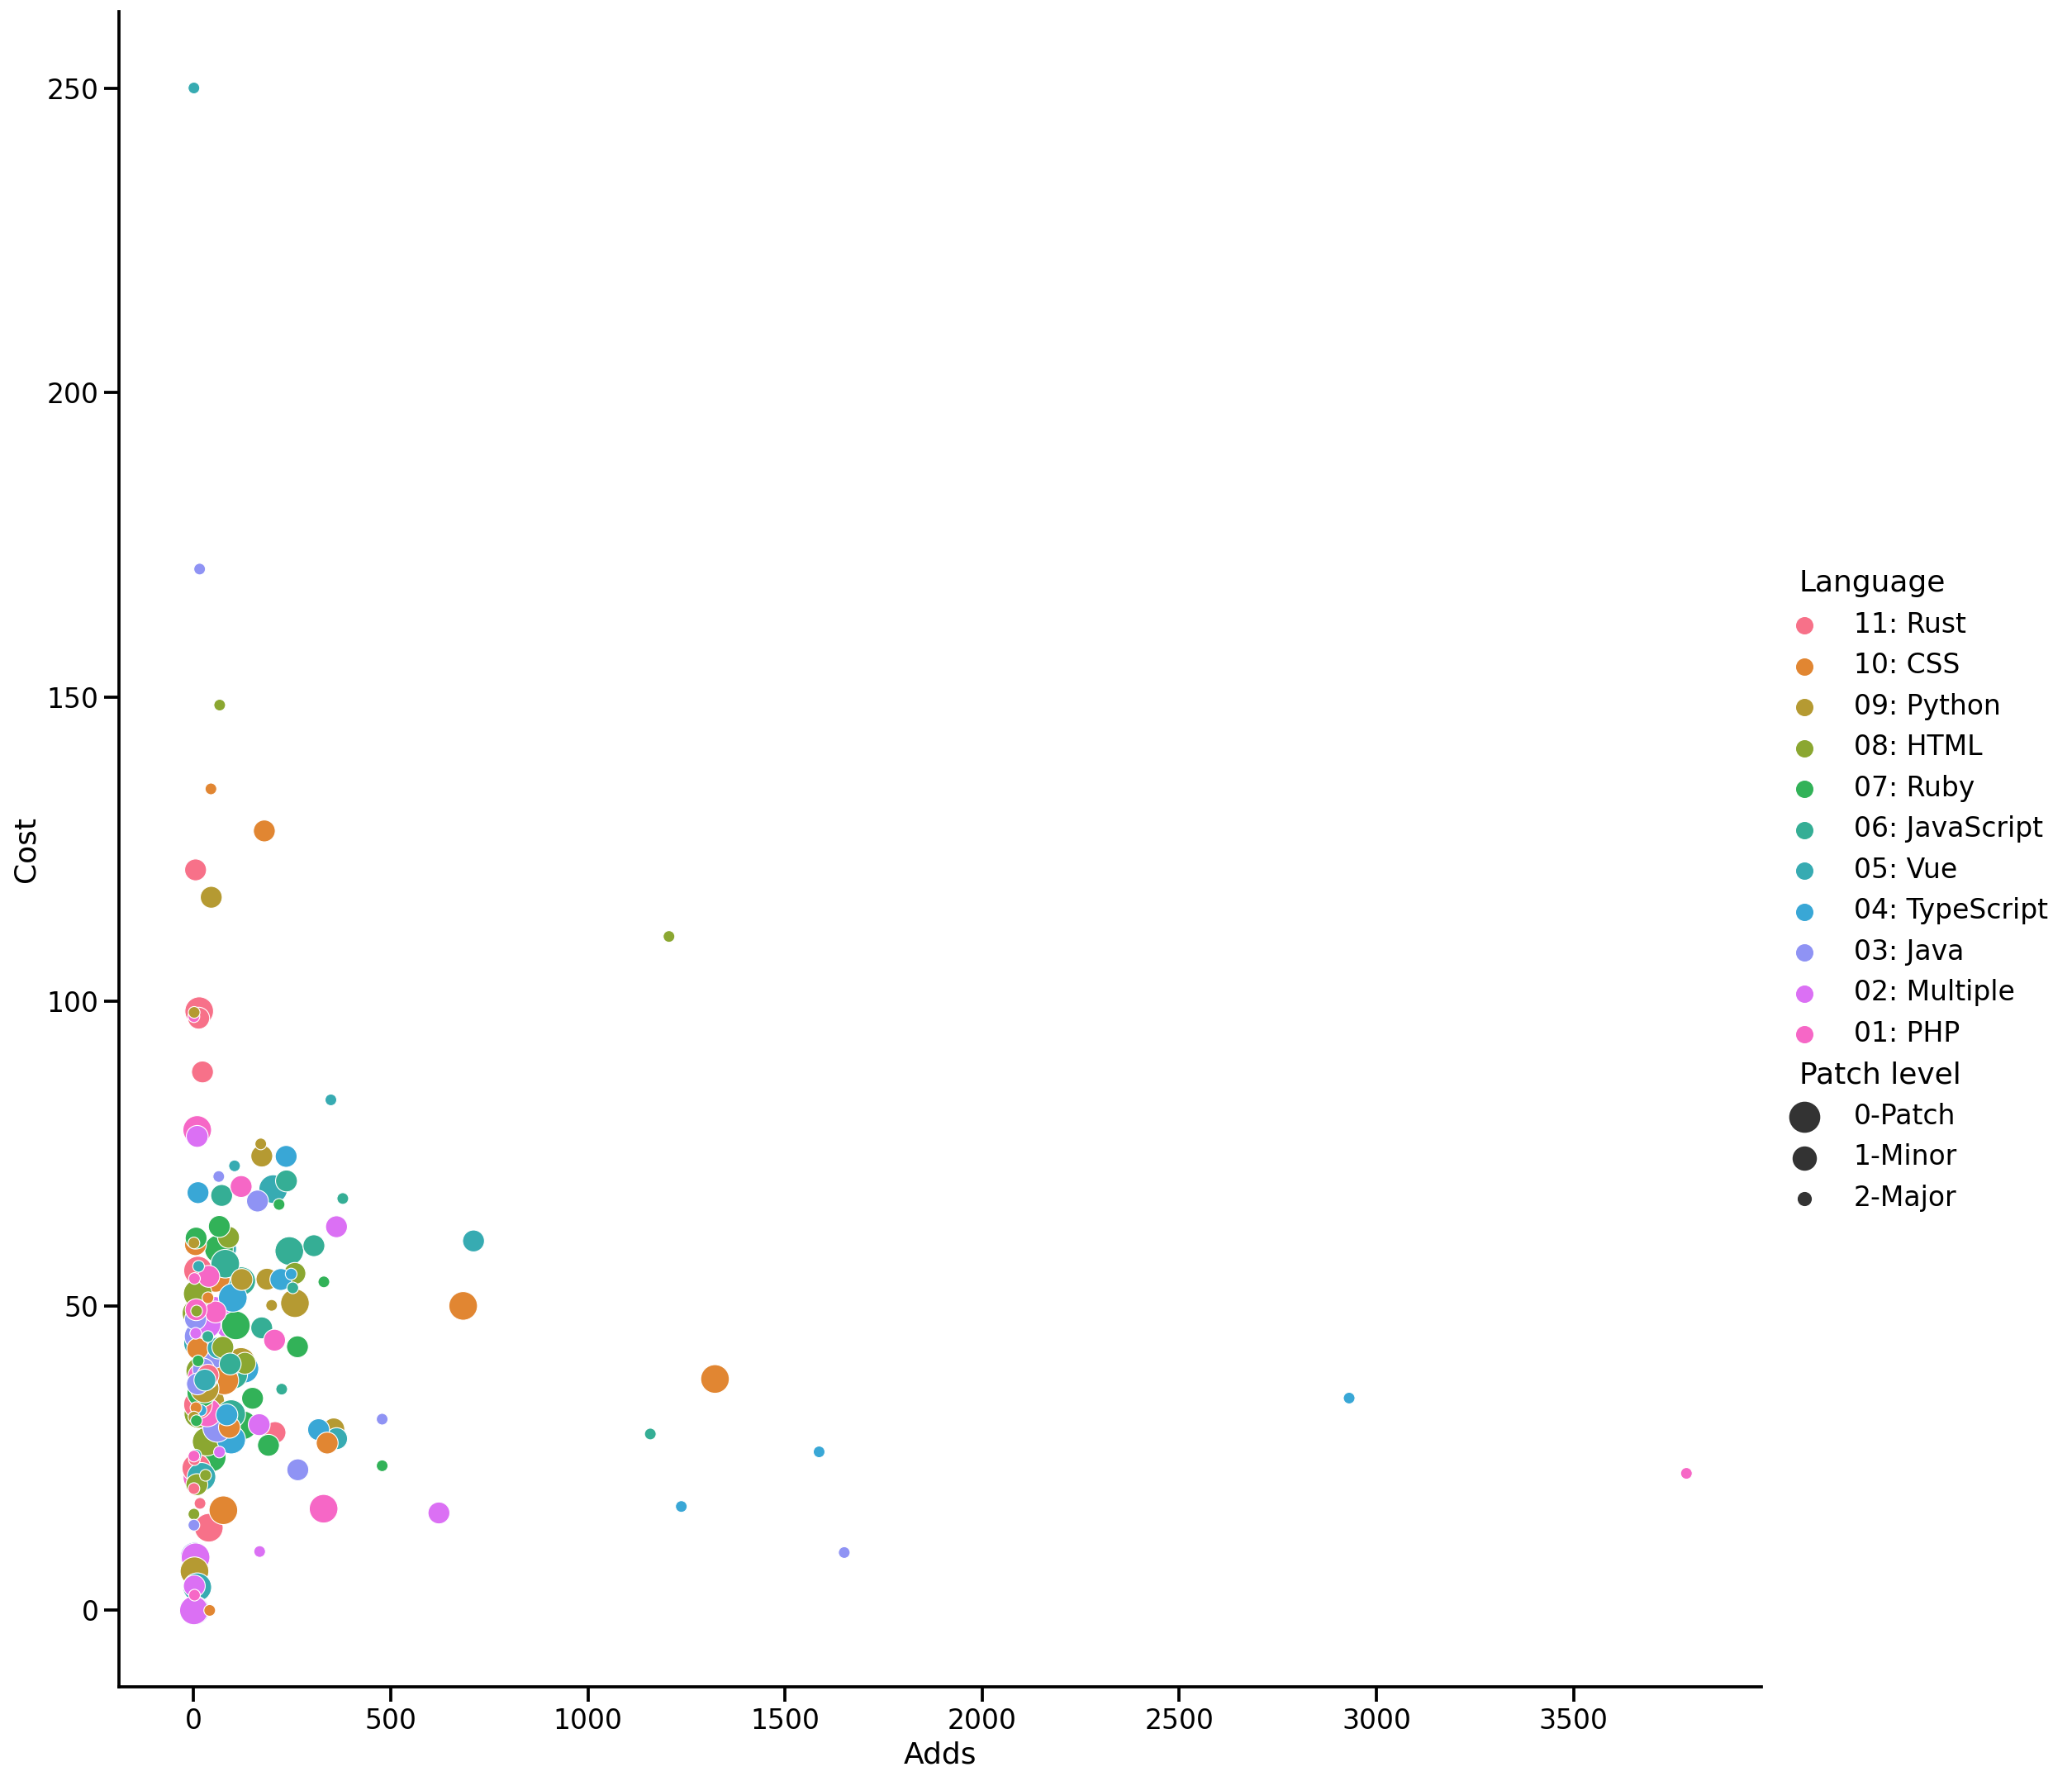

In [29]:
sns.relplot(x="Adds", y="Cost", size="Patch level", hue="Language", sizes=(50, 300), height=15, data=df_agg);

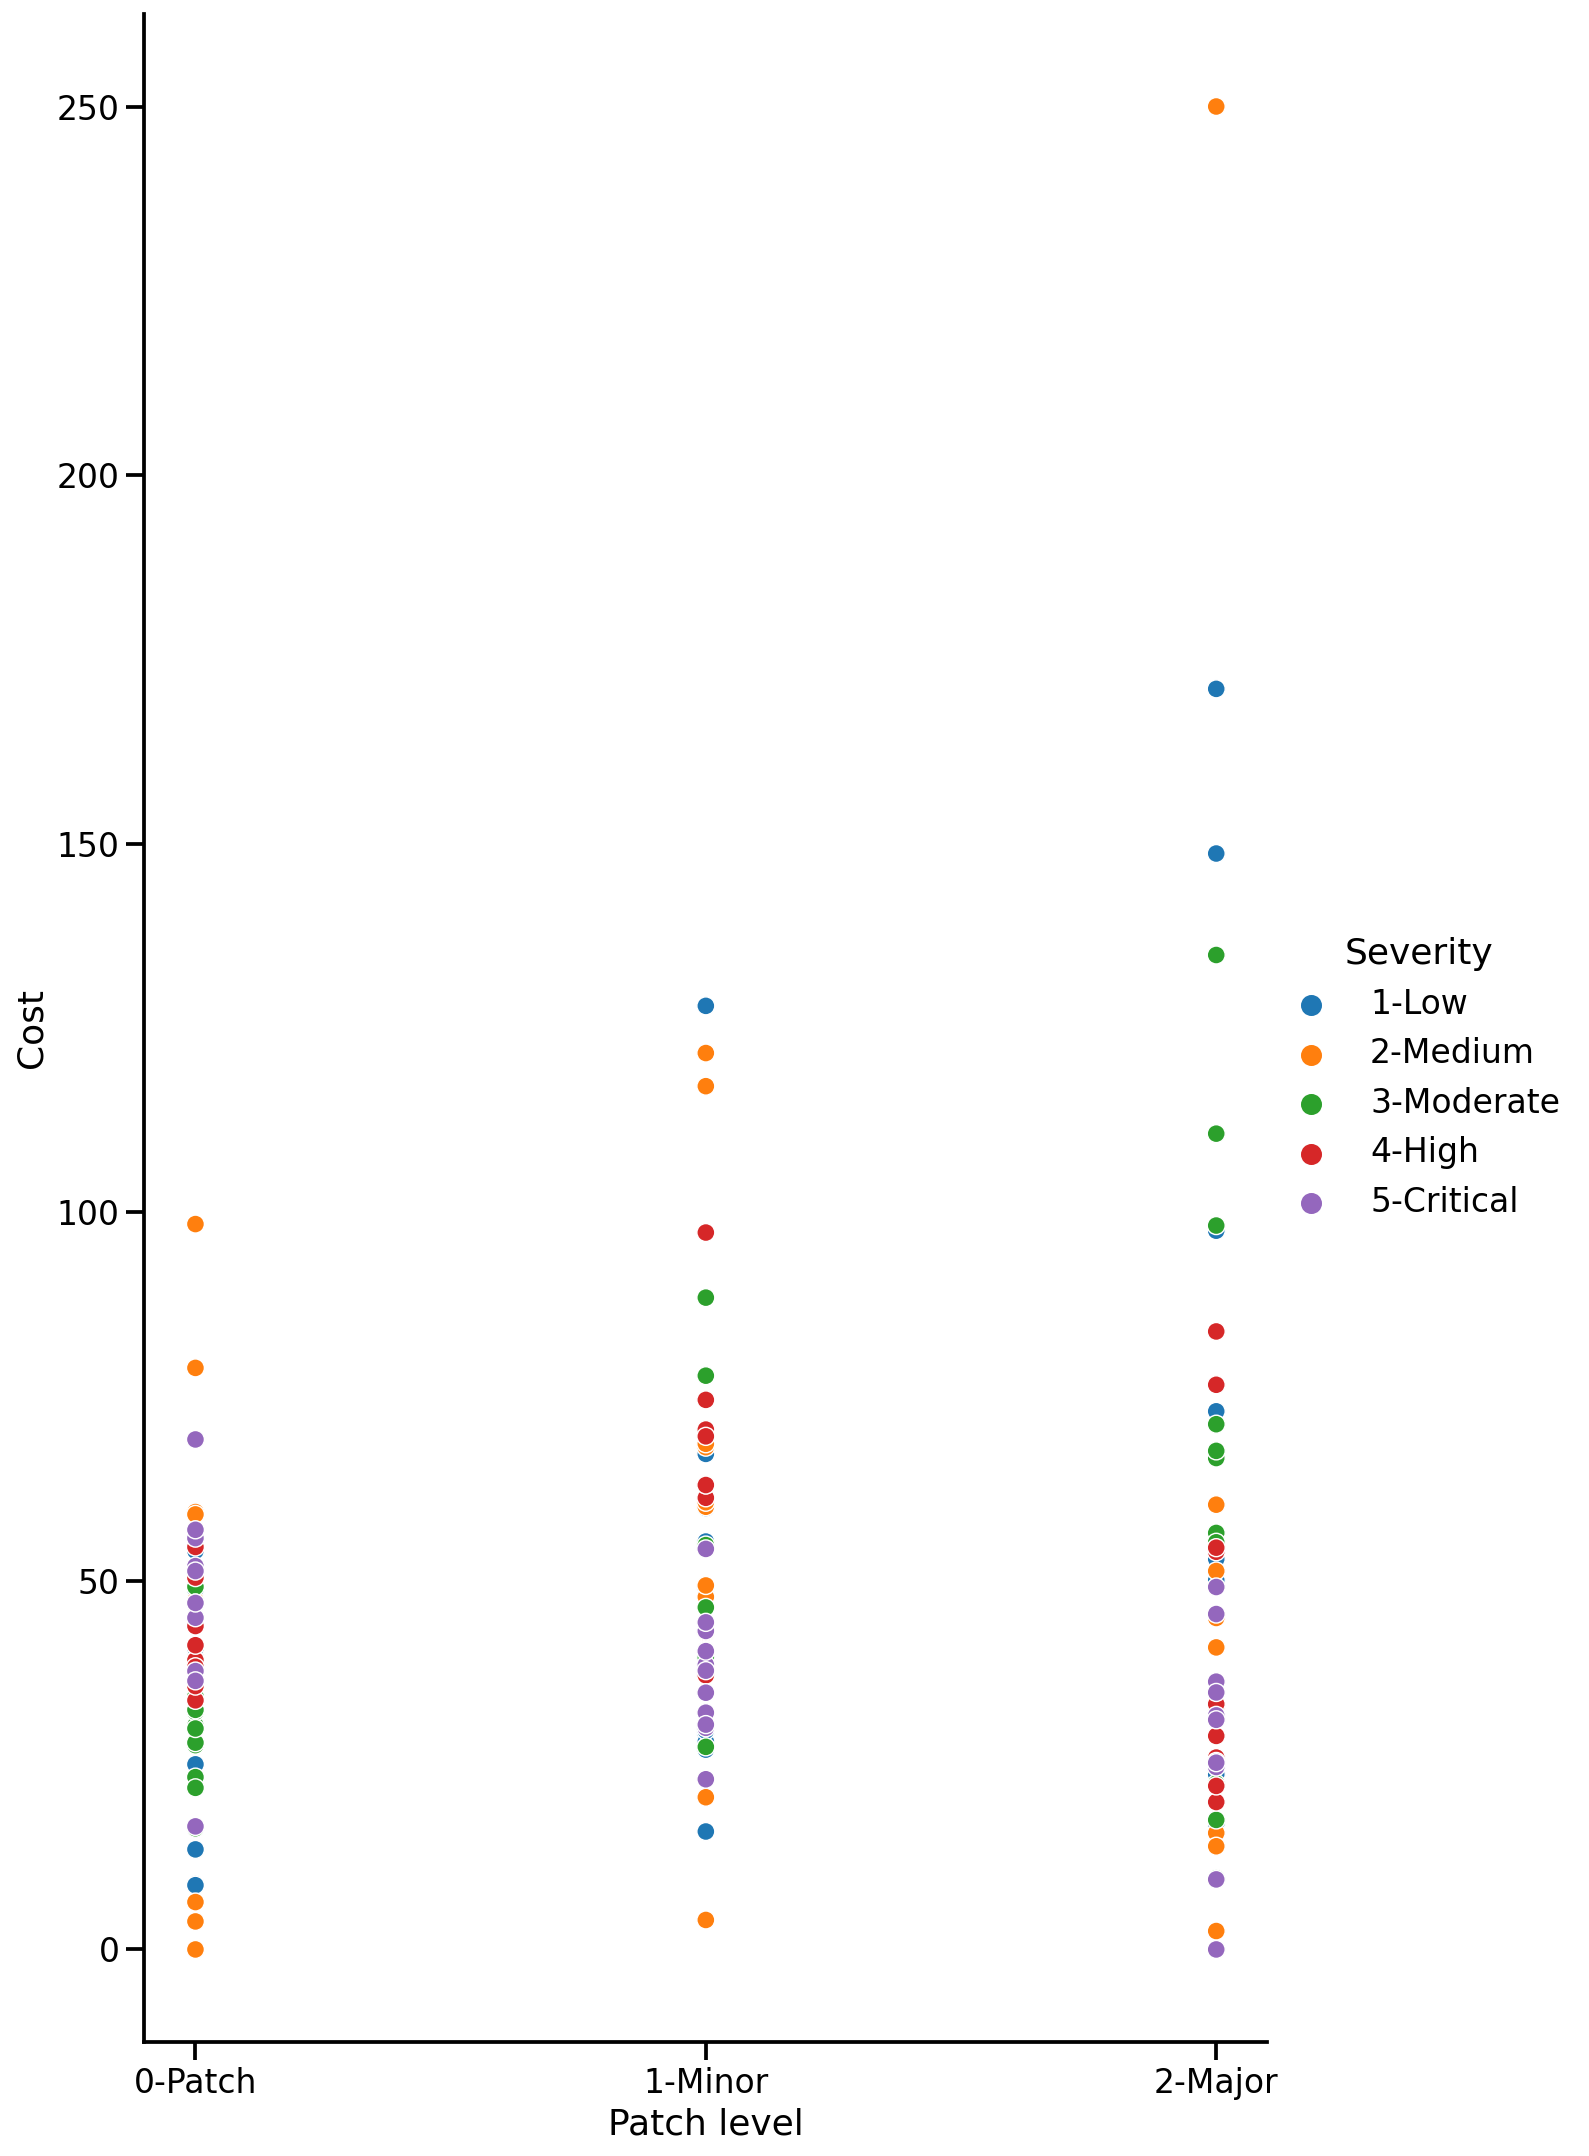

In [30]:
sns.relplot(hue="Severity", y="Cost", kind="scatter", x="Patch level", markers=False, dashes=True, data=df_agg, height=15, aspect=0.6, estimator=None);
#The confidence intervals are computed using bootstrapping

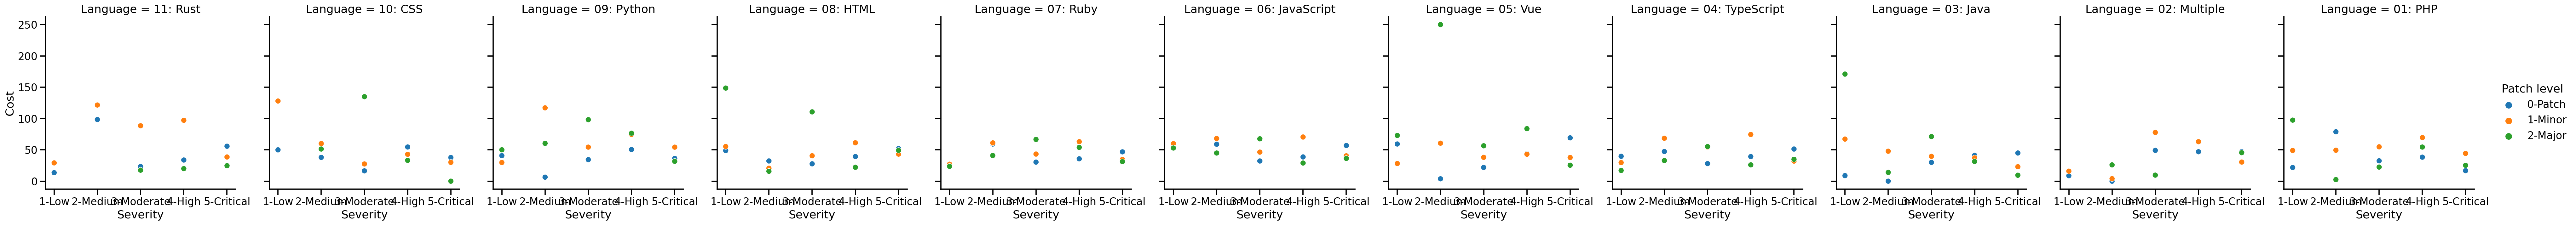

In [31]:
sns.relplot(x="Severity", y="Cost", hue="Patch level", markers=True,
            col="Language", data=df_agg);

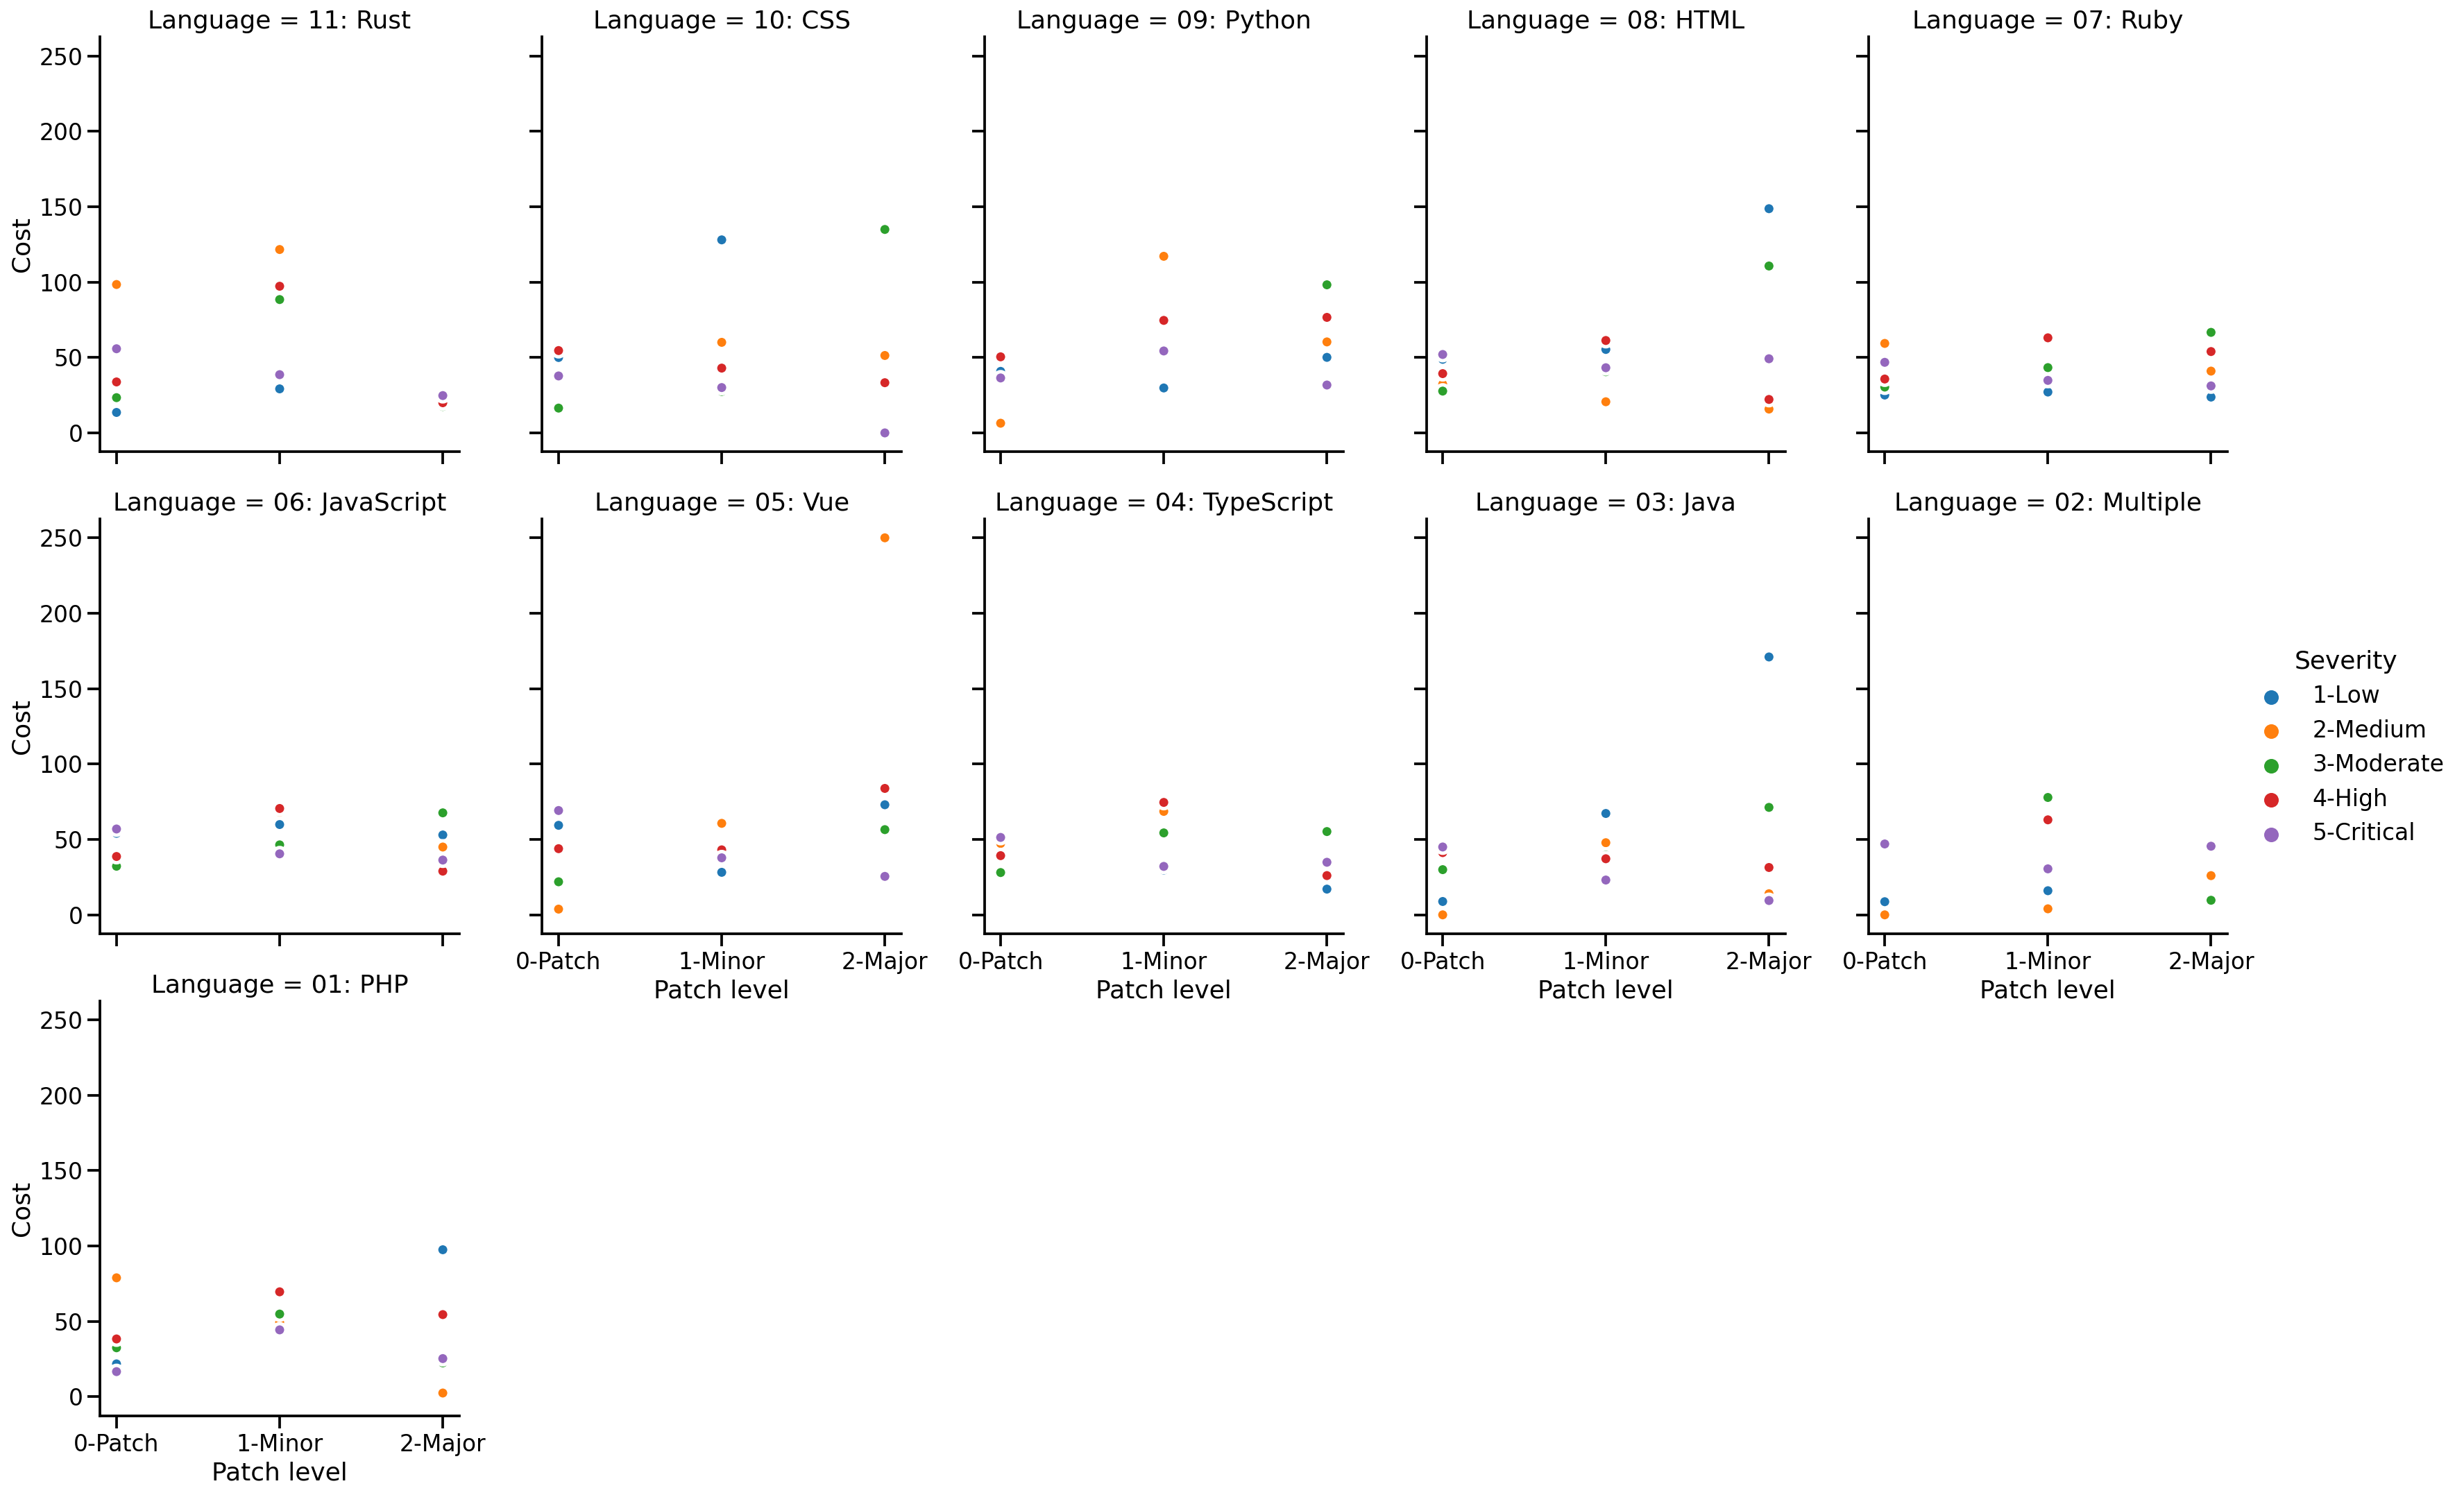

In [32]:
sns.relplot(x="Patch level", y="Cost", hue="Severity", col_wrap=5,
            col="Language", markers=True, height=5, aspect=.90, linewidth=2.5,
            estimator=None, data=df_agg);